In this Notebook, I present the process of analyzing the dataset and processing data for modelling.

In [1]:
#!jupyter nbconvert --to script Build_Dataset.ipynb

In [2]:
#Import libraries
import pandas as pd
import numpy as np
from Build_Dataset import build_dataframe
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from IPython.display import display
from category_encoders import BinaryEncoder, OrdinalEncoder 
from sklearn.cluster import KMeans
import pickle

              id                                              title condition  \
0  MCO1433346850  Alimento En Granulos Tetra Color Para Pe - g a...       new   
1   MCO935603440  Alimento Agility Gold Mantenimiento G - kg a $...       new   
2  MCO1205825188                     Arena Sanitaria King Cat 25kg        new   
3   MCO807001516  Alimento Hill's Prescription Diet Uri - kg a $...       new   
4  MCO1529714436  Alimento Max Cat Professional Line Para Gato A...       new   

                   thumbnail_id catalog_product_id listing_type_id  \
0  740092-MLA54697178729_032023        MCO22485756    gold_special   
1  612923-MLA47975750767_102021        MCO18477727    gold_special   
2  934966-MCO42507995970_072020        MCO19990089    gold_special   
3  770853-MLA43714053621_102020        MCO15698082    gold_special   
4  795668-MLU50237257913_062022        MCO19149377    gold_special   

                                           permalink buying_mode site_id  \
0  https://www.m

In [3]:
#Define parameters
category_id = 'MCO1071'

In [4]:
df = build_dataframe(category_id)

In [5]:
#Resulting df
pd.set_option('display.max_columns', None)
df.head(3)

,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,permalink,buying_mode,site_id,category_id,domain_id,thumbnail,currency_id,order_backend,price,original_price,sale_price,sold_quantity,available_quantity,official_store_id,use_thumbnail_id,accepts_mercadopago,tags,shipping,stop_time,seller,seller_address,address,attributes,installments,winner_item_id,catalog_listing,discounts,promotions,inventory_id,official_store_name,variation_filters,variations_data,differential_pricing
0,MCO1433346850,Alimento En Granulos Tetra Color Para Pe - g a...,new,740092-MLA54697178729_032023,MCO22485756,gold_special,https://www.mercadolibre.com.co/alimento-en-gr...,buy_it_now,MCO,MCO1094,MCO-FISH_FOODS,http://http2.mlstatic.com/D_740092-MLA54697178...,COP,1,53900,NaN,None,250,250,NaN,True,True,"[supermarket_eligible, immediate_payment, cart...","{'store_pick_up': False, 'free_shipping': Fals...",2043-04-04T04:00:00.000Z,"{'id': 34541957, 'nickname': 'AQUAVIDA COLOMBI...","{'comment': '', 'address_line': '', 'id': None...","{'state_id': 'CO-ANT', 'state_name': 'Antioqui...","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 1497.22, 'rate': 0,...",None,True,None,[],CNGD17978,NaN,NaN,NaN,NaN
1,MCO935603440,Alimento Agility Gold Mantenimiento G - kg a $...,new,612923-MLA47975750767_102021,MCO18477727,gold_special,https://www.mercadolibre.com.co/alimento-agili...,buy_it_now,MCO,MCO1077,MCO-CATS_AND_DOGS_FOODS,http://http2.mlstatic.com/D_612923-MLA47975750...,COP,2,162700,NaN,None,250,1,2059.0,True,True,"[good_quality_thumbnail, moderation_penalty, i...","{'store_pick_up': False, 'free_shipping': True...",2042-07-27T04:00:00.000Z,"{'id': 69407075, 'nickname': 'IPETPLACE S.A.S'...","{'comment': '', 'address_line': '', 'id': None...","{'state_id': 'CO-DC', 'state_name': 'Bogotá D....","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 4519.44, 'rate': 0,...",None,True,None,[],QCBQ29169,Ipetplace,NaN,NaN,NaN
2,MCO1205825188,Arena Sanitaria King Cat 25kg,new,934966-MCO42507995970_072020,MCO19990089,gold_special,https://www.mercadolibre.com.co/arena-sanitari...,buy_it_now,MCO,MCO116338,MCO-CATS_LITTER,http://http2.mlstatic.com/D_934966-MCO42507995...,COP,3,99000,NaN,None,150,1,2059.0,True,True,"[good_quality_thumbnail, immediate_payment, ca...","{'store_pick_up': False, 'free_shipping': True...",2043-01-22T04:00:00.000Z,"{'id': 69407075, 'nickname': 'IPETPLACE S.A.S'...","{'comment': '', 'address_line': '', 'id': None...","{'state_id': 'CO-DC', 'state_name': 'Bogotá D....","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 2750, 'rate': 0, 'c...",None,True,None,[],CIIS15666,Ipetplace,NaN,NaN,NaN


# Variables Analysis

In [6]:
df.columns

Index(['id', 'title', 'condition', 'thumbnail_id', 'catalog_product_id',
       'listing_type_id', 'permalink', 'buying_mode', 'site_id', 'category_id',
       'domain_id', 'thumbnail', 'currency_id', 'order_backend', 'price',
       'original_price', 'sale_price', 'sold_quantity', 'available_quantity',
       'official_store_id', 'use_thumbnail_id', 'accepts_mercadopago', 'tags',
       'shipping', 'stop_time', 'seller', 'seller_address', 'address',
       'attributes', 'installments', 'winner_item_id', 'catalog_listing',
       'discounts', 'promotions', 'inventory_id', 'official_store_name',
       'variation_filters', 'variations_data', 'differential_pricing'],
      dtype='object')

From a preliminary analysis, the following are the chosen variables as relevant towards solving the business case:

Numerical variables:

* Price
* Original price
* Sold quantity
* Avalaible quantity

Non numerical variables:

* Positive tags
* Shipping
* Listing Type

Seller id uniquely identifies sellers (it needs to be extracted from the 'seller' column)

Difference between sale price and original price could not be calculated


## Descriptive statistics

In [7]:
df.dtypes

id                       object
title                    object
condition                object
thumbnail_id             object
catalog_product_id       object
listing_type_id          object
permalink                object
buying_mode              object
site_id                  object
category_id              object
domain_id                object
thumbnail                object
currency_id              object
order_backend             int64
price                     int64
original_price          float64
sale_price               object
sold_quantity             int64
available_quantity        int64
official_store_id       float64
use_thumbnail_id           bool
accepts_mercadopago        bool
tags                     object
shipping                 object
stop_time                object
seller                   object
seller_address           object
address                  object
attributes               object
installments             object
winner_item_id           object
catalog_

In [8]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,order_backend,price,original_price,sold_quantity,available_quantity,official_store_id
count,1000.00,1000.00,96.00,1000.00,1000.00,146.00
mean,25.50,250097.68,110504.69,124.49,417.14,1503.12
std,14.44,3333580.75,106439.99,225.21,4181.46,652.65
min,1.00,1900.00,3600.00,0.00,1.00,212.00
25%,13.00,30000.00,32650.00,5.00,1.00,664.00
50%,25.50,87320.00,79820.00,25.00,1.00,2059.00
75%,38.00,161650.00,156587.50,200.00,1.00,2059.00
max,50.00,105000000.00,507200.00,5000.00,50000.00,2059.00


It seems that the items in this category are somewhat expensive.

In [9]:
df[['accepts_mercadopago', 'tags', 'shipping']].describe(include = 'all')

,accepts_mercadopago,tags,shipping
count,1000,1000,1000
unique,1,130,78
top,True,"[good_quality_thumbnail, immediate_payment, ca...","{'store_pick_up': False, 'free_shipping': True..."
freq,1000,113,186


All sellers accept MercadoPago. Aditionally, it is necesary to extract tags and shipping information.

## Plots on unstandardized variables

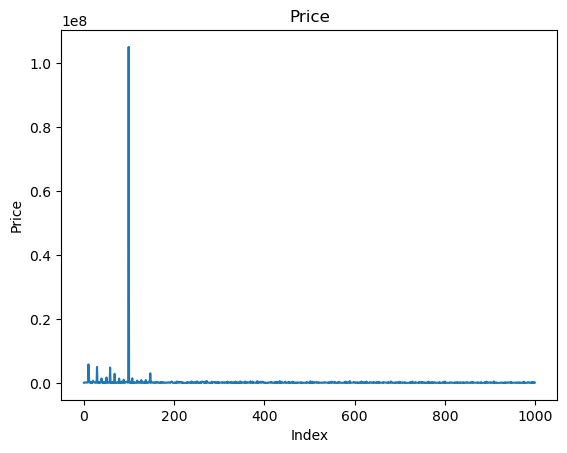

In [10]:
df['price'].plot()

plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Price')


plt.show()

Prices are concentrated towards the left of the plot. It is necessary to standardize this variable.

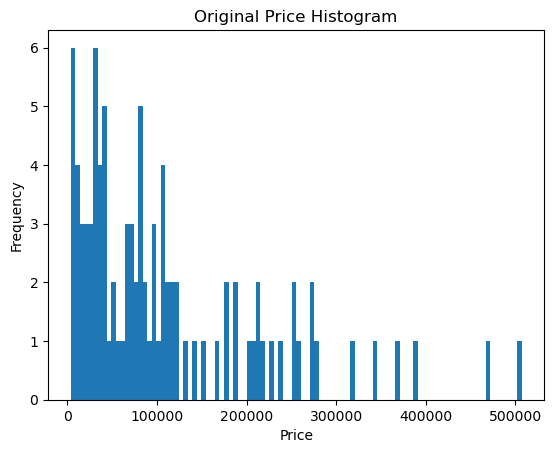

In [11]:
df['original_price'].hist(bins=100)

plt.xlabel('Price')
plt.ylabel('Frequency')

plt.title('Original Price Histogram')
plt.grid(False)

plt.show()

The same applies for the original price.

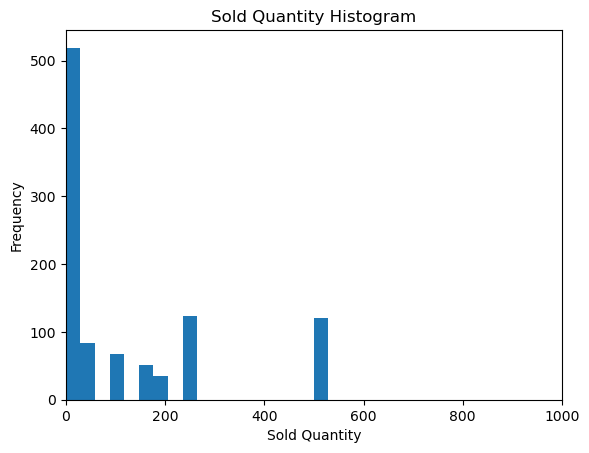

In [12]:
df['sold_quantity'].hist(bins=170)

plt.xlabel('Sold Quantity')
plt.ylabel('Frequency')

plt.title('Sold Quantity Histogram')
plt.grid(False)
plt.xlim(0, 1000)

plt.show()

The majority of sellers sold close to 1 item.

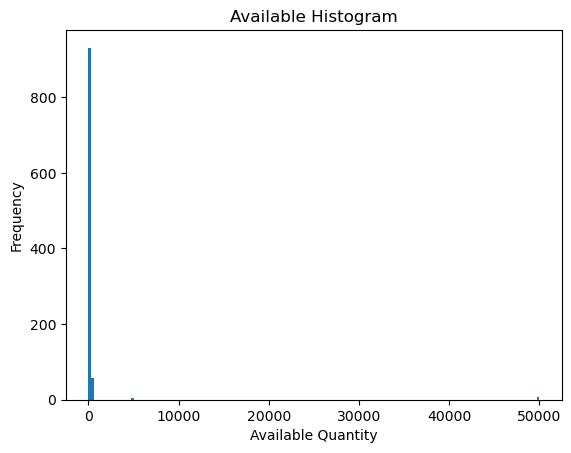

In [13]:
df['available_quantity'].hist(bins=170)

plt.xlabel('Available Quantity')
plt.ylabel('Frequency')

plt.title('Available Histogram')
plt.grid(False)
#plt.xlim(0, 1000)

plt.show()

There are outliers on this variable. If we limit the x axis to 1000, we obtain:

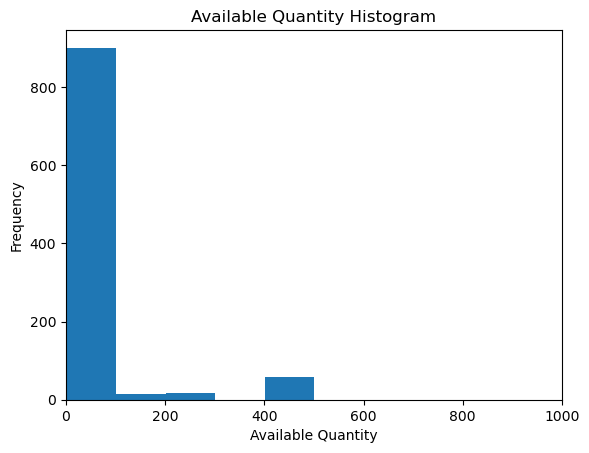

In [14]:
df['available_quantity'].hist(bins=500)

plt.xlabel('Available Quantity')
plt.ylabel('Frequency')

plt.title('Available Quantity Histogram')
plt.grid(False)
plt.xlim(0, 1000)

plt.show()

Most sellers have from 1 to a 100 items available for sale.

# Data Preparation

First, we standardize numerical variables using the Standard Scaler since we want to keep the distribution of the variables and a sense of the outliers.

## Numerical variables handling

In [15]:
# Select the numerical columns to standardize
columns_to_normalize = ['price', 'original_price', 'sold_quantity', 'available_quantity']

# Standardize the columns using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the selected columns
scaler.fit(df[columns_to_normalize])

# Transform the selected columns and replace the values in the DataFrame
df[columns_to_normalize] = scaler.transform(df[columns_to_normalize])

# Print the modified DataFrame
print(df)

                id                                              title  \
0    MCO1433346850  Alimento En Granulos Tetra Color Para Pe - g a...   
1     MCO935603440  Alimento Agility Gold Mantenimiento G - kg a $...   
2    MCO1205825188                     Arena Sanitaria King Cat 25kg    
3     MCO807001516  Alimento Hill's Prescription Diet Uri - kg a $...   
4    MCO1529714436  Alimento Max Cat Professional Line Para Gato A...   
..             ...                                                ...   
995   MCO539058308  Placa Grabada Láser Para Mascotas Gatos-perros...   
996   MCO616006339  Alimento Perro Dog Chow Cachorros Minis Y Pequ...   
997  MCO1173400284  Casa Para Perro Raza Medianas Mq + Plato Perro...   
998  MCO1351486028                    No Muerda Pets And Cats X 240ml   
999   MCO559570940                     Arena Sanitaria King Cat 25kg    

    condition                  thumbnail_id catalog_product_id  \
0         new  740092-MLA54697178729_032023        MCO224

## Non numerical variables handling

We need to tranform the following columns:

* Tags
* Shipping
* Seller

First, we are going to extract the information contained as dictionaries into the columns.

In [16]:
id_seller = df['seller'].apply(pd.Series)

From the 'seller' column, we are going to only extract the id.

In [17]:
id_seller = id_seller[['id']]

In [18]:
id_seller.rename(columns={'id': 'id_seller'}, inplace=True)

In [19]:
id_seller

,id_seller
0,34541957
1,69407075
2,69407075
3,57067053
4,352257819
...,...
995,55172203
996,259666262
997,164168474
998,280824856


In [20]:
shipping = df['shipping'].apply(pd.Series)

In [21]:
shipping = shipping[['free_shipping']]

In [22]:
shipping

,free_shipping
0,False
1,True
2,True
3,True
4,True
...,...
995,False
996,False
997,True
998,False


From the 'shipping' column, we are to extract only the free shipping info.

In [23]:
tags = df['tags'].apply(pd.Series)

From the tags info, we are going to use the first 5 tags.

In [24]:
tags.rename(columns={0: 'tag_1', 1:'tag_2', 2:'tag_3', 3:'tag_4', 4:'tag_5'}, inplace=True)

In [25]:
tags = tags[['tag_1', 'tag_2','tag_3' ,'tag_4','tag_5']]

In [26]:
tags

,tag_1,tag_2,tag_3,tag_4,tag_5
0,supermarket_eligible,immediate_payment,cart_eligible,best_seller_candidate,shipping_guaranteed
1,good_quality_thumbnail,moderation_penalty,immediate_payment,cart_eligible,best_seller_candidate
2,good_quality_thumbnail,immediate_payment,cart_eligible,best_seller_candidate,NaN
3,good_quality_thumbnail,immediate_payment,cart_eligible,best_seller_candidate,NaN
4,good_quality_thumbnail,immediate_payment,cart_eligible,best_seller_candidate,NaN
...,...,...,...,...,...
995,good_quality_thumbnail,loyalty_discount_eligible,immediate_payment,cart_eligible,NaN
996,good_quality_picture,good_quality_thumbnail,loyalty_discount_eligible,immediate_payment,cart_eligible
997,good_quality_thumbnail,good_quality_picture,immediate_payment,cart_eligible,NaN
998,good_quality_thumbnail,immediate_payment,cart_eligible,NaN,NaN


Now, we are going to concat these new dataframes to our original dataframe and perfom some further transformations. But first, we reduce the original dataframe to only relevant columns.

In [27]:
dff = df[['id', 'listing_type_id', 'price', 'original_price', 'sold_quantity', 'available_quantity']]

In [28]:
#Concat with id_seller
dff = pd.concat([dff, id_seller], axis=1)

In [29]:
#Concat with free shipping
dff = pd.concat([dff, shipping], axis=1)

In [30]:
#Concat with tags
dff = pd.concat([dff, tags], axis=1)

In [31]:
#Resulting dataframe
dff.head(3)

,id,listing_type_id,price,original_price,sold_quantity,available_quantity,id_seller,free_shipping,tag_1,tag_2,tag_3,tag_4,tag_5
0,MCO1433346850,gold_special,-0.06,NaN,0.56,-0.04,34541957,False,supermarket_eligible,immediate_payment,cart_eligible,best_seller_candidate,shipping_guaranteed
1,MCO935603440,gold_special,-0.03,NaN,0.56,-0.10,69407075,True,good_quality_thumbnail,moderation_penalty,immediate_payment,cart_eligible,best_seller_candidate
2,MCO1205825188,gold_special,-0.05,NaN,0.11,-0.10,69407075,True,good_quality_thumbnail,immediate_payment,cart_eligible,best_seller_candidate,NaN


In [32]:
#Check column's types
dff.dtypes

id                     object
listing_type_id        object
price                 float64
original_price        float64
sold_quantity         float64
available_quantity    float64
id_seller               int64
free_shipping            bool
tag_1                  object
tag_2                  object
tag_3                  object
tag_4                  object
tag_5                  object
dtype: object

In [33]:
dff['id_seller'] = dff['id_seller'].astype(str)

In [34]:
dff['id_seller'].nunique()

195

We have 194 unique sellers in this category.

### Encoding

Here is the encoding that will be used for non-numerical variables

In [35]:
# table
data = {'Variable': ['listing_type_id', 'free_shipping', 'Tags 1-5'],
        'Encoding': ['Ordinal Encoding', 'Binary Encoding', 'One-Hot Encoding']}

table1 = pd.DataFrame(data)

display(table1)

,Variable,Encoding
0,listing_type_id,Ordinal Encoding
1,free_shipping,Binary Encoding
2,Tags 1-5,One-Hot Encoding


In [36]:
dff['listing_type_id'].unique() #there are only two categories

array(['gold_special', 'gold_pro'], dtype=object)

In [37]:
#listing_type_id encoding
maplist = [{'col': 'listing_type_id', 'mapping': {'gold_special': 1, 'gold_pro': 2}}]
oe = OrdinalEncoder(cols = ['listing_type_id'], mapping=maplist)
df_encoded = oe.fit_transform(dff)

In [38]:
df_encoded

,id,listing_type_id,price,original_price,sold_quantity,available_quantity,id_seller,free_shipping,tag_1,tag_2,tag_3,tag_4,tag_5
0,MCO1433346850,1,-0.06,NaN,0.56,-0.04,34541957,False,supermarket_eligible,immediate_payment,cart_eligible,best_seller_candidate,shipping_guaranteed
1,MCO935603440,1,-0.03,NaN,0.56,-0.10,69407075,True,good_quality_thumbnail,moderation_penalty,immediate_payment,cart_eligible,best_seller_candidate
2,MCO1205825188,1,-0.05,NaN,0.11,-0.10,69407075,True,good_quality_thumbnail,immediate_payment,cart_eligible,best_seller_candidate,NaN
3,MCO807001516,1,-0.03,NaN,1.67,-0.10,57067053,True,good_quality_thumbnail,immediate_payment,cart_eligible,best_seller_candidate,NaN
4,MCO1529714436,1,-0.03,NaN,-0.53,0.02,352257819,True,good_quality_thumbnail,immediate_payment,cart_eligible,best_seller_candidate,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,MCO539058308,1,-0.07,NaN,0.34,-0.05,55172203,False,good_quality_thumbnail,loyalty_discount_eligible,immediate_payment,cart_eligible,NaN
996,MCO616006339,1,-0.07,NaN,0.56,-0.10,259666262,False,good_quality_picture,good_quality_thumbnail,loyalty_discount_eligible,immediate_payment,cart_eligible
997,MCO1173400284,2,-0.02,NaN,-0.33,-0.10,164168474,True,good_quality_thumbnail,good_quality_picture,immediate_payment,cart_eligible,NaN
998,MCO1351486028,1,-0.07,NaN,-0.54,-0.10,280824856,False,good_quality_thumbnail,immediate_payment,cart_eligible,NaN,NaN


In [39]:
mapping1 = [
    {'col': 'free_shipping', 'mapping': {'False': 0, 'True': 1}}
]

encoder = BinaryEncoder(cols=['free_shipping'], mapping=mapping1)

# Perform binary encoding
df_enc1 = encoder.fit_transform(df_encoded)

In [40]:
df_enc1 = df_enc1.drop(['free_shipping_1'], axis=1)

In [41]:
df_enc1

,id,listing_type_id,price,original_price,sold_quantity,available_quantity,id_seller,free_shipping_0,tag_1,tag_2,tag_3,tag_4,tag_5
0,MCO1433346850,1,-0.06,NaN,0.56,-0.04,34541957,0,supermarket_eligible,immediate_payment,cart_eligible,best_seller_candidate,shipping_guaranteed
1,MCO935603440,1,-0.03,NaN,0.56,-0.10,69407075,1,good_quality_thumbnail,moderation_penalty,immediate_payment,cart_eligible,best_seller_candidate
2,MCO1205825188,1,-0.05,NaN,0.11,-0.10,69407075,1,good_quality_thumbnail,immediate_payment,cart_eligible,best_seller_candidate,NaN
3,MCO807001516,1,-0.03,NaN,1.67,-0.10,57067053,1,good_quality_thumbnail,immediate_payment,cart_eligible,best_seller_candidate,NaN
4,MCO1529714436,1,-0.03,NaN,-0.53,0.02,352257819,1,good_quality_thumbnail,immediate_payment,cart_eligible,best_seller_candidate,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,MCO539058308,1,-0.07,NaN,0.34,-0.05,55172203,0,good_quality_thumbnail,loyalty_discount_eligible,immediate_payment,cart_eligible,NaN
996,MCO616006339,1,-0.07,NaN,0.56,-0.10,259666262,0,good_quality_picture,good_quality_thumbnail,loyalty_discount_eligible,immediate_payment,cart_eligible
997,MCO1173400284,2,-0.02,NaN,-0.33,-0.10,164168474,1,good_quality_thumbnail,good_quality_picture,immediate_payment,cart_eligible,NaN
998,MCO1351486028,1,-0.07,NaN,-0.54,-0.10,280824856,0,good_quality_thumbnail,immediate_payment,cart_eligible,NaN,NaN


In [42]:
#Tags 1-5
columns_to_encode = ['tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5']
encoded_columns = pd.get_dummies(df_enc1[columns_to_encode])
df_final = pd.concat([df_enc1, encoded_columns], axis=1)

In [43]:
df_final = df_final.drop(columns_to_encode, axis=1)

In [44]:
#Finally, we encode the item id

label_encoder = LabelEncoder()
df_final['item_id_encoded'] = label_encoder.fit_transform(df_final['id'])

# Convert the encoded item ids into a feature matrix
feature_matrix = df_final['item_id_encoded'].values.reshape(-1, 1)

# Perform clustering using K-Means
kmeans = KMeans(n_clusters=50, random_state=42)
clusters = kmeans.fit_predict(feature_matrix)

# Assign the cluster labels to the dataframe
df_final['id_clustered'] = clusters

C:\Users\Asus ZenBook\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus ZenBook\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [45]:
df_final['id_clustered'].value_counts()

2     24
24    23
21    22
16    22
8     22
14    22
30    22
29    22
42    22
4     22
41    22
34    21
43    21
0     21
25    21
13    21
23    21
12    21
11    21
7     21
22    20
47    20
31    20
39    20
9     20
3     20
19    20
20    20
18    20
27    20
32    20
45    20
6     19
36    19
33    19
10    19
37    19
5     19
49    19
26    19
35    19
38    19
40    18
46    18
1     18
17    18
44    17
15    16
28    16
48    15
Name: id_clustered, dtype: int64

In [46]:
#Finally, we deal with missing values
columns_with_missing_values = df_final.columns[df_final.isna().any()].tolist()

# Print the columns with missing values
print(columns_with_missing_values)

['original_price']


In [47]:
#Replace the value of the original price equal to the price if it is missing
df_final['original_price'] = np.where(pd.isnull(df_final['original_price']), df_final['price'], df_final['original_price'])

In [48]:
#Resulting df
df_final.head(3)

,id,listing_type_id,price,original_price,sold_quantity,available_quantity,id_seller,free_shipping_0,tag_1_catalog_boost,tag_1_catalog_forewarning,tag_1_catalog_listing_eligible,tag_1_catalog_only_restricted,tag_1_dragged_bids_and_visits,tag_1_good_quality_picture,tag_1_good_quality_thumbnail,tag_1_immediate_payment,tag_1_incomplete_technical_specs,tag_1_loyalty_discount_eligible,tag_1_moderation_penalty,tag_1_poor_quality_picture,tag_1_poor_quality_thumbnail,tag_1_standard_price_by_channel,tag_1_supermarket_eligible,tag_2_cart_eligible,tag_2_catalog_listing_eligible,tag_2_deal_of_the_day,tag_2_dragged_bids_and_visits,tag_2_good_quality_picture,tag_2_good_quality_thumbnail,tag_2_immediate_payment,tag_2_incomplete_technical_specs,tag_2_loyalty_discount_eligible,tag_2_moderation_penalty,tag_2_poor_quality_picture,tag_2_poor_quality_thumbnail,tag_2_standard_price_by_channel,tag_2_supermarket_eligible,tag_3_best_seller_candidate,tag_3_cart_eligible,tag_3_deal_of_the_day,tag_3_good_quality_picture,tag_3_good_quality_thumbnail,tag_3_immediate_payment,tag_3_incomplete_technical_specs,tag_3_loyalty_discount_eligible,tag_3_moderation_penalty,tag_3_poor_quality_picture,tag_3_poor_quality_thumbnail,tag_3_shipping_guaranteed,tag_3_standard_price_by_channel,tag_3_supermarket_eligible,tag_4_best_seller_candidate,tag_4_cart_eligible,tag_4_catalog_listing_eligible,tag_4_catalog_only_restricted,tag_4_dragged_bids_and_visits,tag_4_good_quality_picture,tag_4_good_quality_thumbnail,tag_4_immediate_payment,tag_4_loyalty_discount_eligible,tag_4_meli_choice_candidate,tag_4_moderation_penalty,tag_4_shipping_guaranteed,tag_4_standard_price_by_channel,tag_4_supermarket_eligible,tag_5_best_seller_candidate,tag_5_cart_eligible,tag_5_dragged_bids_and_visits,tag_5_good_quality_picture,tag_5_immediate_payment,tag_5_loyalty_discount_eligible,tag_5_shipping_guaranteed,tag_5_supermarket_eligible,item_id_encoded,id_clustered
0,MCO1433346850,1,-0.06,-0.06,0.56,-0.04,34541957,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,370,37
1,MCO935603440,1,-0.03,-0.03,0.56,-0.10,69407075,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,952,46
2,MCO1205825188,1,-0.05,-0.05,0.11,-0.10,69407075,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,91,2


In [49]:
#Save the dataframe as a pickle file
with open('dataframe.pkl', 'wb') as f:
    pickle.dump(df_final, f)

We already have our dataset for begin the modelling process!